<a href="https://colab.research.google.com/github/Lucreiche04/Lucreiche04/blob/main/Analyse%20arbre%20Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv('/content/p2-arbres-fr.csv', delimiter=';')

# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher des informations générales sur les colonnes
print(df.info())

# Vérifier le nombre de valeurs manquantes par colonne
print(df.isnull().sum())


      id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aes

1.2 Identifier les colonnes pertinentes
Examiner les colonnes pour identifier celles qui seront utiles pour l'analyse :

espèce : pour identifier les types d'arbres.
arrondissement : pour localiser les arbres.
circonférence_cm : pour la taille des arbres.
hauteur_m : pour la hauteur des arbres.
stade_developpement : pour comprendre l'âge ou le stade de croissance.

In [ ]:
# Imputer les valeurs manquantes pour les colonnes catégorielles
df['type_emplacement'] = df['type_emplacement'].fillna(df['type_emplacement'].mode()[0])
df['domanialite'] = df['domanialite'].fillna(df['domanialite'].mode()[0])
df['arrondissement'] = df['arrondissement'].fillna(df['arrondissement'].mode()[0])

# Imputer les valeurs manquantes pour les colonnes numériques
df['circonference_cm'] = df['circonference_cm'].fillna(df['circonference_cm'].mean())
df['hauteur_m'] = df['hauteur_m'].fillna(df['hauteur_m'].mean())

# Vérifier à nouveau les valeurs manquantes après imputation
print(df.isnull().sum())


id                          0
type_emplacement            0
domanialite                 0
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


In [ ]:
# Supprimer les doublons éventuels
df = df.drop_duplicates()


In [ ]:
#Analyse descriptive univariée
# Statistiques descriptives pour les colonnes numériques
print(df[['circonference_cm', 'hauteur_m']].describe())

# Statistiques descriptives pour les colonnes catégorielles
print(df['espece'].value_counts())
print(df['arrondissement'].value_counts())


       circonference_cm      hauteur_m
count     200137.000000  200137.000000
mean          83.380479      13.110509
std          673.190213    1971.217387
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max       250255.000000  881818.000000
espece
x hispanica                  36409
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: count, Length: 539, dtype: int64
arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCEN

#Interpretation des résultats

Statistiques descriptives générales : Ces statistiques nous donnent des informations sur la circonférence (en cm) et la hauteur (en m) des arbres de Paris:
Moyenne :
Circonférence moyenne : 83 cm
Hauteur moyenne : 13 m

Écart-type :
La circonférence des arbres présente un écart important autour de la moyenne, avec un écart-type de 673 cm. Cela montre une grande diversité dans les tailles des arbres.
Pour la hauteur, l'écart-type est de 1971 m, ce qui semble énorme, probablement dû à des erreurs dans les données (par exemple, des valeurs aberrantes).

Quartiles :
25% des arbres ont une circonférence inférieure à 30 cm, et 75% des arbres mesurent moins de 115 cm de circonférence.
Pour la hauteur, 50% des arbres ont une hauteur inférieure à 8 m.


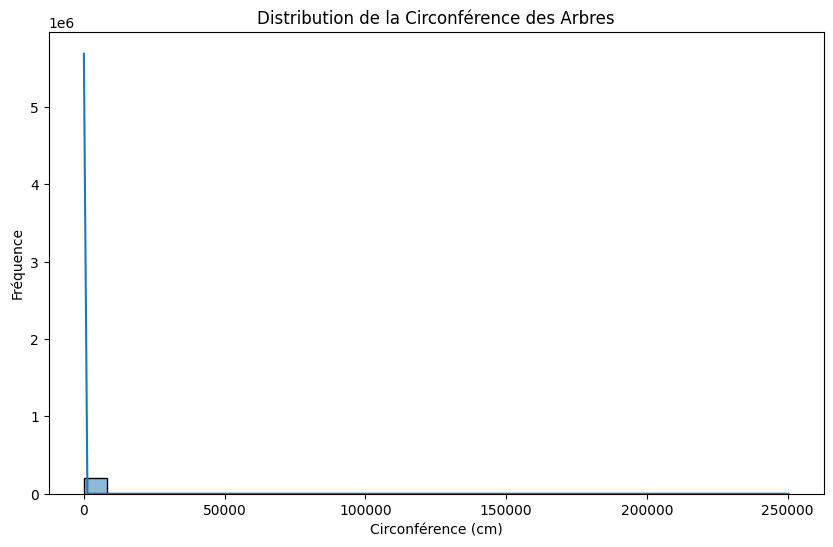

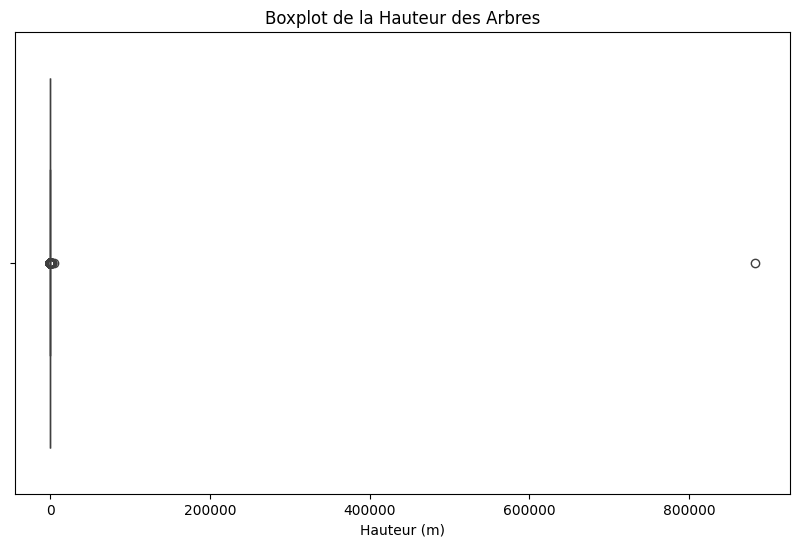

In [ ]:
#Réalisez des visualisations adaptées pour explorer la distribution des valeurs (histogrammes, diagrammes en barres, boxplots,
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la circonférence

plt.figure(figsize=(10, 6))
sns.histplot(df['circonference_cm'], bins=30, kde=True)
plt.title('Distribution de la Circonférence des Arbres')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Fréquence')
plt.show()

# Boxplot de la hauteur
plt.figure(figsize=(10, 6))
sns.boxplot(x='hauteur_m', data=df)
plt.title('Boxplot de la Hauteur des Arbres')
plt.xlabel('Hauteur (m)')
plt.show()


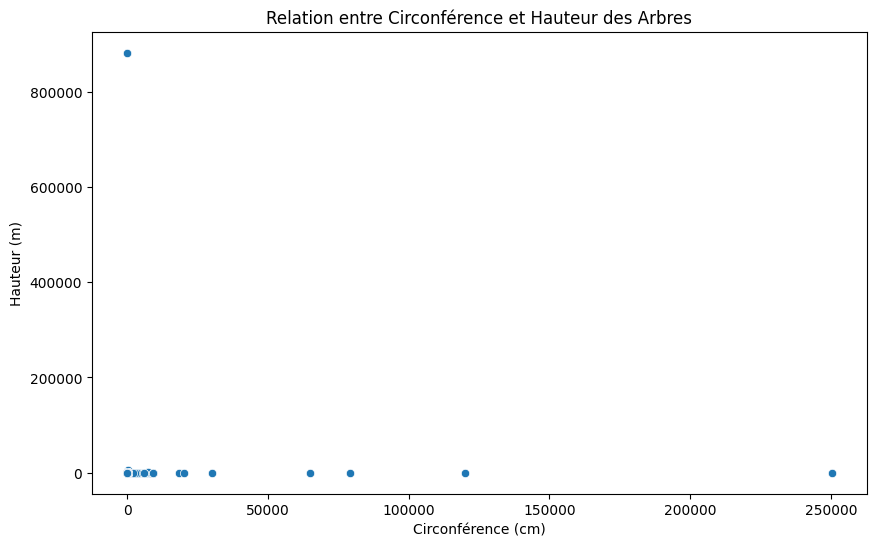

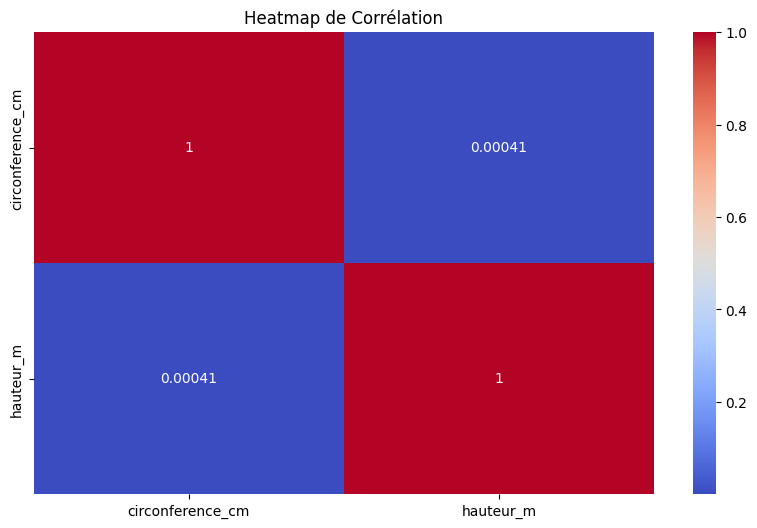

In [ ]:
#Analyse bivariée
# Nuage de points entre la circonférence et la hauteur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='circonference_cm', y='hauteur_m', data=df)
plt.title('Relation entre Circonférence et Hauteur des Arbres')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 6))
correlation_matrix = df[['circonference_cm', 'hauteur_m']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Corrélation')
plt.show()


In [ ]:
#Analyse spatiale
# Afficher les premières lignes des colonnes de coordonnées
print(df[['geo_point_2d_a', 'geo_point_2d_b']].head())



   geo_point_2d_a  geo_point_2d_b
0       48.857620        2.320962
1       48.857656        2.321031
2       48.857705        2.321061
3       48.857722        2.321006
4       48.890435        2.315289


In [ ]:
# Vérifier le format des coordonnées et les séparer en latitude et longitude
# En supposant que geo_point_2d_a = latitude et geo_point_2d_b = longitude

# Convertir les colonnes en type float
df['latitude'] = df['geo_point_2d_a'].astype(float)
df['longitude'] = df['geo_point_2d_b'].astype(float)

# Vérifier que les colonnes sont créées correctement
print(df[['latitude', 'longitude']].head())


    latitude  longitude
0  48.857620   2.320962
1  48.857656   2.321031
2  48.857705   2.321061
3  48.857722   2.321006
4  48.890435   2.315289


In [ ]:
import folium

# Créer une carte centrée sur Paris
map_paris = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter des marqueurs pour chaque arbre
for _, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['espece']).add_to(map_paris)

# Enregistrer la carte en tant que fichier HTML
map_paris.save('carte_arbre_paris.html')

# Afficher un message pour confirmer que la carte a été créée
print("Carte enregistrée sous le nom 'carte_arbre_paris.html'.")


Carte enregistrée sous le nom 'carte_arbre_paris.html'.


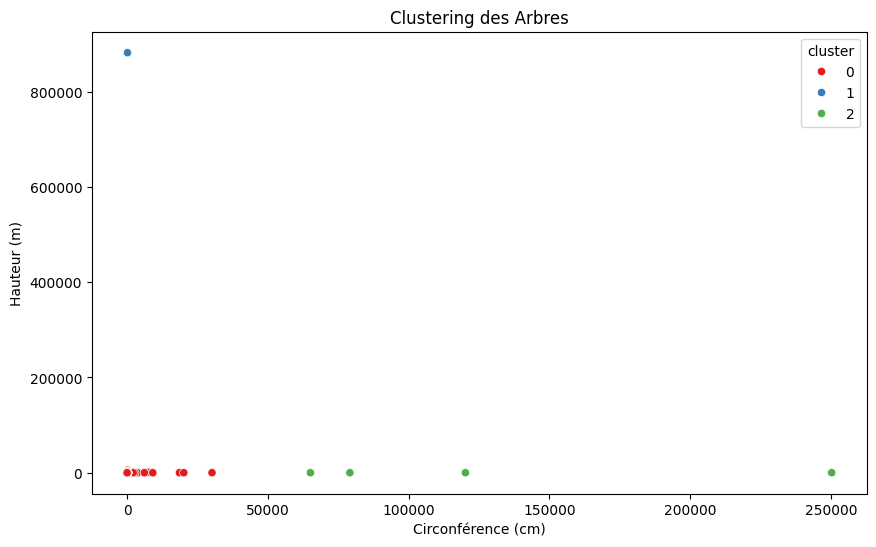

In [ ]:
from sklearn.cluster import KMeans

# Exemple de clustering sur la circonférence et la hauteur
X = df[['circonference_cm', 'hauteur_m']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='circonference_cm', y='hauteur_m', hue='cluster', data=df, palette='Set1')
plt.title('Clustering des Arbres')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.show()
